## Sales Projection


### Import Libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

%matplotlib inline

### Import Dataset

In [3]:
DATAPATH = r'orders.csv'

df = pd.read_csv(DATAPATH, sep=';')
df.head()

,order_date,total_order,product_1,product_2,product_3,product_4,product_5,product_6
0,01/01/2020,8794,50,2436,1504,510,1776,2518
1,02/01/2020,3496,622,622,210,877,717,448
2,03/01/2020,3384,562,328,1022,589,447,436
3,04/01/2020,3325,53,50,1007,894,888,433
4,05/01/2020,3230,74,543,759,849,601,404


In [4]:
df.tail()

,order_date,total_order,product_1,product_2,product_3,product_4,product_5,product_6
420,24/02/2021,15590,2822,4428,2947,889,3118,1386
421,25/02/2021,46771,8232,8232,3134,11973,9822,5378
422,26/02/2021,17134,2810,1628,5106,2947,2502,2141
423,27/02/2021,16620,296,133,5086,4305,4537,2263
424,28/02/2021,15789,458,2605,3568,4089,2731,2338


In [5]:
df.shape

(425, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   order_date   425 non-null    object
 1   total_order  425 non-null    int64 
 2   product_1    425 non-null    int64 
 3   product_2    425 non-null    int64 
 4   product_3    425 non-null    int64 
 5   product_4    425 non-null    int64 
 6   product_5    425 non-null    int64 
 7   product_6    425 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 26.7+ KB


In [7]:
# correcting date format
df['order_date'] = pd.to_datetime(df['order_date'], format="%d/%m/%Y")

In [8]:
# set Order Date as index
df.set_index('order_date', inplace=True)

In [9]:
df.tail()

,total_order,product_1,product_2,product_3,product_4,product_5,product_6
order_date,,,,,,,
2021-02-24,15590,2822,4428,2947,889,3118,1386
2021-02-25,46771,8232,8232,3134,11973,9822,5378
2021-02-26,17134,2810,1628,5106,2947,2502,2141
2021-02-27,16620,296,133,5086,4305,4537,2263
2021-02-28,15789,458,2605,3568,4089,2731,2338


In [10]:
df.describe()

,total_order,product_1,product_2,product_3,product_4,product_5,product_6
count,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000
mean,12758.108235,1646.275294,2330.061176,2750.065882,2205.136471,2176.228235,1650.341176
std,11626.547062,1852.515812,2747.987134,2971.261575,2336.868574,2575.777352,2891.854589
min,2024.000000,0.000000,0.000000,0.000000,3.000000,5.000000,267.000000
25%,7000.000000,320.000000,896.000000,1137.000000,905.000000,1023.000000,816.000000
50%,11132.000000,1445.000000,1735.000000,2244.000000,1838.000000,1658.000000,1341.000000
75%,15344.000000,2442.000000,3060.000000,3470.000000,2817.000000,2606.000000,1768.000000
max,119291.000000,21769.000000,32359.000000,37219.000000,32089.000000,32089.000000,52148.000000


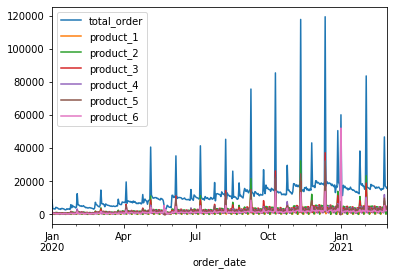

In [11]:
df.plot()

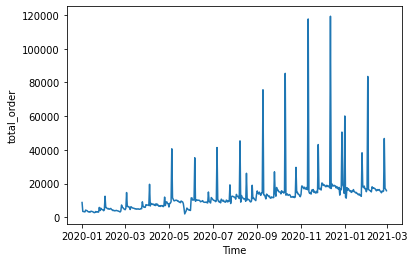

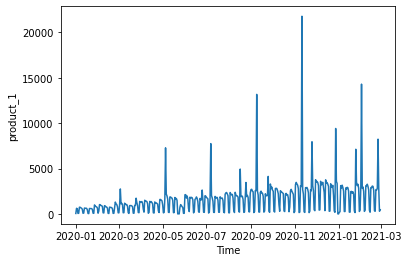

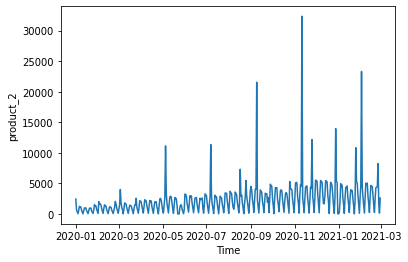

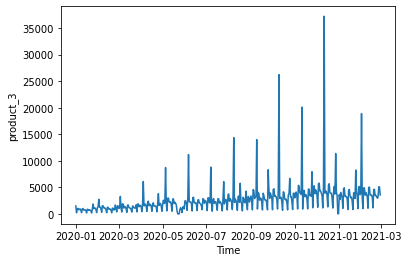

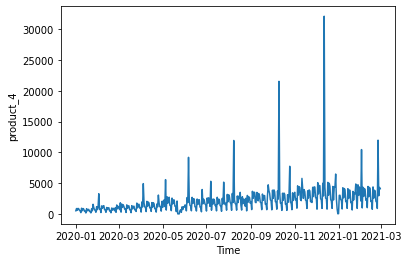

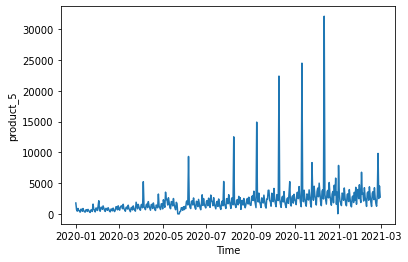

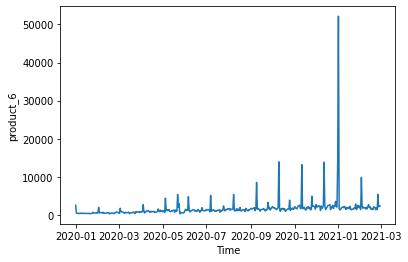

In [12]:
def plot_data(col):
#    plt.figure(figsize=(17, 8))
    plt.plot(df[col])
    plt.xlabel('Time')
    plt.ylabel(col)
    plt.grid(False)
    plt.show()
    
for col in df.columns:
    plot_data(col)

### Import Holidays

In [13]:
datapath_holidays = r'holidays.csv'

df_holidays = pd.read_csv(datapath_holidays, sep=';')

In [14]:
# correcting date format
df_holidays['Date'] = pd.to_datetime(df_holidays['Date'], format="%d/%m/%Y")

In [15]:
df_holidays.head()

,Campaign Name,Date
0,Double-Double Campaign,2020-01-01
1,Payday Sale,2020-01-25
2,Double-Double Campaign,2020-02-02
3,Payday Sale,2020-02-25
4,Double-Double Campaign,2020-03-03


In [16]:
# change columns name to meet prophet requirement
df_holidays.columns = ['holiday', 'ds']
df_holidays.head()

,holiday,ds
0,Double-Double Campaign,2020-01-01
1,Payday Sale,2020-01-25
2,Double-Double Campaign,2020-02-02
3,Payday Sale,2020-02-25
4,Double-Double Campaign,2020-03-03


### Modelling

In [21]:
# prophet library hasn't been installed on this computer
!python -m pip install prophet


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
# update plotly
!pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.3 MB 7.2 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


In [23]:
!pip install pystan==2.19.1.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62.6 MB 91 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0


In [24]:
#!conda install pystan==2.17.1.0
#!conda install -c conda-forge fbprophet==0.6.0

In [37]:
# import prophet
from prophet import Prophet
import logging

logging.getLogger().setLevel(logging.ERROR)

In [38]:
# Splitting train and test dataset. Test set is order data from February 2021.
df_train = df.loc[:'2021-01-31']
df_test = df.loc['2021-02-01':]

In [39]:
df_train.tail()

,total_order,product_1,product_2,product_3,product_4,product_5,product_6
order_date,,,,,,,
2021-01-27,17618,3118,5003,3312,898,3612,1675
2021-01-28,18544,3264,3060,1001,4729,3969,2521
2021-01-29,16921,2843,1574,4975,3012,2487,2030
2021-01-30,17019,269,102,5174,4374,4731,2369
2021-01-31,15195,441,2629,3616,3981,2690,1838


In [40]:
df_test.head()

,total_order,product_1,product_2,product_3,product_4,product_5,product_6
order_date,,,,,,,
2021-02-01,16715,2908,4630,3811,2106,1855,1405
2021-02-02,83573,14291,23317,18888,10447,6769,9861
2021-02-03,16548,2830,4484,2830,976,3210,2218
2021-02-04,16217,2968,2789,989,4330,3373,1768
2021-02-05,15892,2495,1494,4911,2845,2098,2049


In [41]:
# take first column for modelling
df_train1 = df_train[['product_1']]

In [42]:
df_train1.head()

,product_1
order_date,
2020-01-01,50
2020-01-02,622
2020-01-03,562
2020-01-04,53
2020-01-05,74


In [43]:
# put date index as column and change columns name for prophet
df_train1 = df_train1.reset_index()
df_train1.columns = ['ds', 'y']
df_train1.head()

,ds,y
0,2020-01-01,50
1,2020-01-02,622
2,2020-01-03,562
3,2020-01-04,53
4,2020-01-05,74


In [44]:
# Defining model with yearly seasonality and holidays. Then fitting.
m = Prophet(daily_seasonality=False, yearly_seasonality=True, holidays = df_holidays)
m.fit(df_train1)

DEBUG:cmdstanpy:input tempfile: /tmp/tmprik6hwhl/xynqzk5p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprik6hwhl/174j189b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14097', 'data', 'file=/tmp/tmprik6hwhl/xynqzk5p.json', 'init=/tmp/tmprik6hwhl/174j189b.json', 'output', 'file=/tmp/tmprik6hwhl/prophet_model8_lshz0w/prophet_model-20221230172421.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:24:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:24:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [45]:
# Forecasting February 2021 orders
prediction_size = 28
future = m.make_future_dataframe(periods=prediction_size)
forecast = m.predict(future)

In [46]:
forecast.tail(28)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas,Christmas_lower,Christmas_upper,Double-Double Campaign,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
397,2021-02-01,2337.999737,1596.909670,4233.873724,2337.999737,2337.999737,0.0,0.0,0.0,0.000000,...,737.406238,737.406238,737.406238,-165.878172,-165.878172,-165.878172,0.0,0.0,0.0,2909.527802
398,2021-02-02,2342.643729,5443.801988,8257.406357,2342.643729,2342.643729,0.0,0.0,0.0,4155.244951,...,538.368065,538.368065,538.368065,-171.799848,-171.799848,-171.799848,0.0,0.0,0.0,6864.456897
399,2021-02-03,2347.287722,1767.416868,4507.502199,2347.287722,2347.287722,0.0,0.0,0.0,0.000000,...,991.748640,991.748640,991.748640,-179.164107,-179.164107,-179.164107,0.0,0.0,0.0,3159.872255
400,2021-02-04,2351.931715,1274.221052,3894.716248,2351.931686,2351.931715,0.0,0.0,0.0,0.000000,...,445.950591,445.950591,445.950591,-187.715969,-187.715969,-187.715969,0.0,0.0,0.0,2610.166338
401,2021-02-05,2356.575708,992.361744,3678.284533,2356.575625,2356.575716,0.0,0.0,0.0,0.000000,...,150.966674,150.966674,150.966674,-197.164595,-197.164595,-197.164595,0.0,0.0,0.0,2310.377787
402,2021-02-06,2361.219701,-858.288905,1966.411288,2361.219567,2361.219732,0.0,0.0,0.0,0.000000,...,-1549.254659,-1549.254659,-1549.254659,-207.194139,-207.194139,-207.194139,0.0,0.0,0.0,604.770904
403,2021-02-07,2365.863694,-523.607929,2255.904698,2365.863496,2365.863763,0.0,0.0,0.0,0.000000,...,-1315.185548,-1315.185548,-1315.185548,-217.475046,-217.475046,-217.475046,0.0,0.0,0.0,833.203100
404,2021-02-08,2370.507687,1621.821984,4189.744088,2370.507424,2370.507797,0.0,0.0,0.0,0.000000,...,737.406238,737.406238,737.406238,-227.675457,-227.675457,-227.675457,0.0,0.0,0.0,2880.238468
405,2021-02-09,2375.151680,1381.044062,3996.646939,2375.151337,2375.151855,0.0,0.0,0.0,0.000000,...,538.368065,538.368065,538.368065,-237.472343,-237.472343,-237.472343,0.0,0.0,0.0,2676.047402
406,2021-02-10,2379.795673,1797.780752,4502.254840,2379.795249,2379.795925,0.0,0.0,0.0,0.000000,...,991.748640,991.748640,991.748640,-246.562033,-246.562033,-246.562033,0.0,0.0,0.0,3124.982279


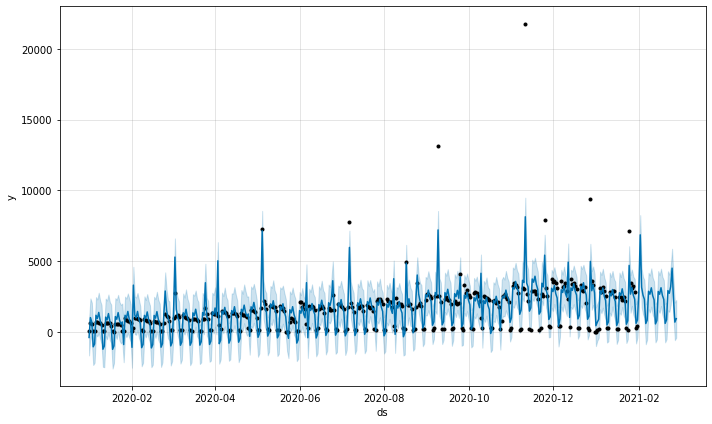

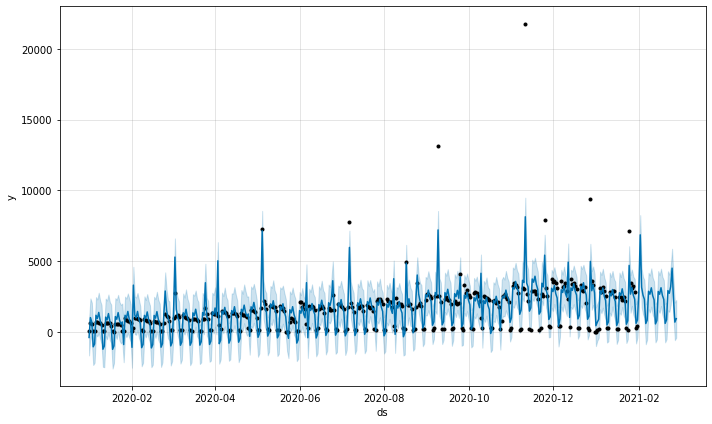

In [47]:
# plot forecast
m.plot(forecast)

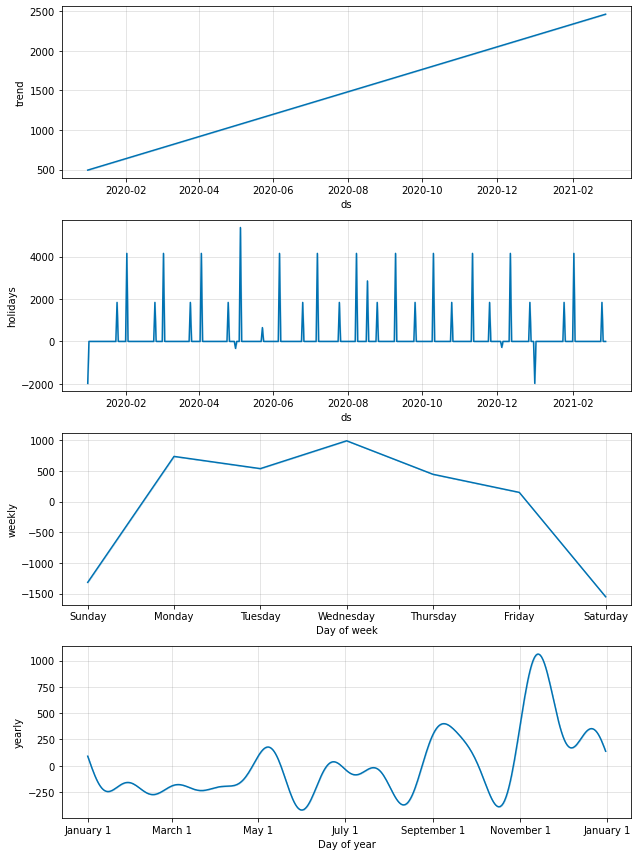

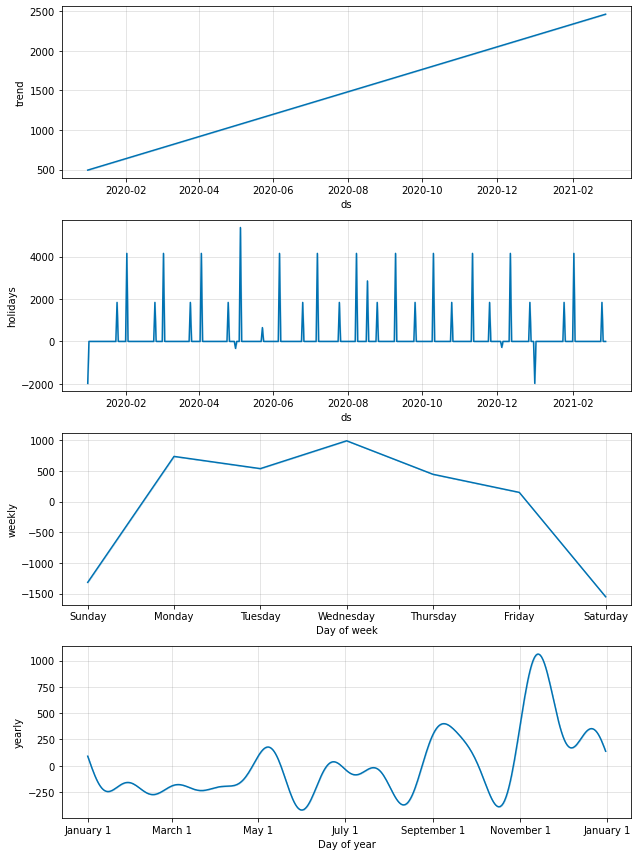

In [48]:
# plot prophet components from model
m.plot_components(forecast)

In [49]:
# function for comparing forecast and real data
def make_comparison_dataframe(historical, forecast):
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical)

In [50]:
cmp_df = make_comparison_dataframe(df[['product_1']], forecast)

cmp_df.tail(28)

,yhat,yhat_lower,yhat_upper,product_1
ds,,,,
2021-02-01,2909.527802,1596.909670,4233.873724,2908
2021-02-02,6864.456897,5443.801988,8257.406357,14291
2021-02-03,3159.872255,1767.416868,4507.502199,2830
2021-02-04,2610.166338,1274.221052,3894.716248,2968
2021-02-05,2310.377787,992.361744,3678.284533,2495
2021-02-06,604.770904,-858.288905,1966.411288,277
2021-02-07,833.203100,-523.607929,2255.904698,438
2021-02-08,2880.238468,1621.821984,4189.744088,3100
2021-02-09,2676.047402,1381.044062,3996.646939,3100


In [51]:
# function for calculation MAPE and MAE
def calculate_forecast_errors(df, prediction_size, col):
    
    df = df.copy()
    
    df['e'] = df[col] - df['yhat']
    df['p'] = 100 * df['e'] / df[col]
    
    predicted_part = df[-prediction_size:]
    
    error_mean = lambda error_name: np.mean(np.abs(predicted_part[error_name]))
    
    return {'MAPE': error_mean('p'), 'MAE': error_mean('e')}

In [52]:
for err_name, err_value in calculate_forecast_errors(cmp_df, prediction_size, 'product_1').items():
    print(err_name, err_value)

MAPE 48.54409564547859
MAE 681.1183215868459


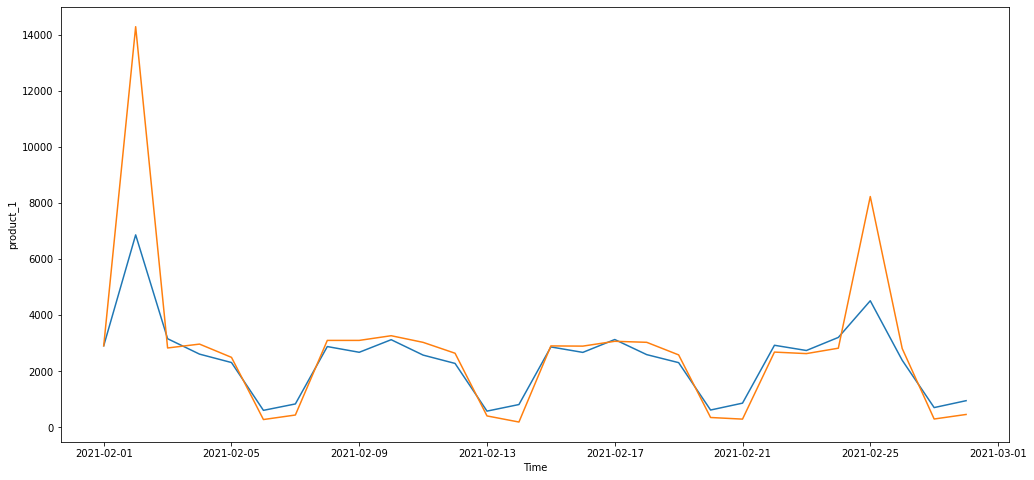

In [53]:
# plotting forecast vs real data
plt.figure(figsize=(17, 8))
plt.plot(cmp_df['yhat'].loc['2021-02-01':])
#plt.plot(cmp_df['yhat_lower'])
#plt.plot(cmp_df['yhat_upper'])
plt.plot(cmp_df['product_1'].loc['2021-02-01':])
plt.xlabel('Time')
plt.ylabel('product_1')
plt.grid(False)
plt.show()

### Modelling on All Columns

In [54]:
def predict_order(col, df_cast):
    # select column to be trained
    train = df_train[[col]]
    test = df_test[[col]]
    
    train = train.reset_index()
    train.columns = ['ds', 'y']
    
    # define model
    m = Prophet(daily_seasonality=False, yearly_seasonality=True, holidays = df_holidays)
    m.fit(train)
    
    # forecasting
    prediction_size = 28
    future = m.make_future_dataframe(periods=prediction_size)
    forecast = m.predict(future)
    
    #comparison
    cmp_df = make_comparison_dataframe(df[[col]], forecast)
    cmp_df.head()
    
    for err_name, err_value in calculate_forecast_errors(cmp_df, prediction_size, col).items():
        print(col, err_name, "%.2f" % err_value)
        
    df_x = forecast[['yhat']].tail(28).reset_index(drop=True)
    df_forecast[col] = pd.Series(df_x['yhat'])

In [55]:
df.columns

Index(['total_order', 'product_1', 'product_2', 'product_3', 'product_4',
       'product_5', 'product_6'],
      dtype='object')

In [56]:
# listing all columns to be predicted
column_predict = ['product_1', 'product_2', 'product_3', 'product_4',
       'product_5', 'product_6']

In [57]:
# define dataframe for forecast result
df_forecast = df.reset_index()
df_forecast = df_forecast[['order_date']]
#df_forecast.columns = ['ds']
df_forecast = df_forecast[-28:].reset_index(drop=True)
df_forecast.head()

,order_date
0,2021-02-01
1,2021-02-02
2,2021-02-03
3,2021-02-04
4,2021-02-05


In [58]:
# running forecasting for all columns
for col in column_predict:
    predict_order(col, df_forecast)

DEBUG:cmdstanpy:input tempfile: /tmp/tmprik6hwhl/ajy0fdil.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprik6hwhl/hjctt07r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38465', 'data', 'file=/tmp/tmprik6hwhl/ajy0fdil.json', 'init=/tmp/tmprik6hwhl/hjctt07r.json', 'output', 'file=/tmp/tmprik6hwhl/prophet_modeli6h49u17/prophet_model-20221230172450.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:24:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:24:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmprik6hwhl/twwmvlk2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprik6hwhl/kag_6tg4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

product_1 MAPE 48.54
product_1 MAE 681.12


DEBUG:cmdstanpy:input tempfile: /tmp/tmprik6hwhl/pfqe80b1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprik6hwhl/5201z58u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29340', 'data', 'file=/tmp/tmprik6hwhl/pfqe80b1.json', 'init=/tmp/tmprik6hwhl/5201z58u.json', 'output', 'file=/tmp/tmprik6hwhl/prophet_modelw7crremf/prophet_model-20221230172451.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:24:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:24:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


product_2 MAPE 50.39
product_2 MAE 840.83


DEBUG:cmdstanpy:input tempfile: /tmp/tmprik6hwhl/l1w12zst.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprik6hwhl/es5wtu5x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89155', 'data', 'file=/tmp/tmprik6hwhl/l1w12zst.json', 'init=/tmp/tmprik6hwhl/es5wtu5x.json', 'output', 'file=/tmp/tmprik6hwhl/prophet_modelwbzjincs/prophet_model-20221230172452.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:24:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:24:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


product_3 MAPE 16.08
product_3 MAE 663.61


DEBUG:cmdstanpy:input tempfile: /tmp/tmprik6hwhl/2g9bcg8g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprik6hwhl/a4qufvsh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64417', 'data', 'file=/tmp/tmprik6hwhl/2g9bcg8g.json', 'init=/tmp/tmprik6hwhl/a4qufvsh.json', 'output', 'file=/tmp/tmprik6hwhl/prophet_model1946upec/prophet_model-20221230172452.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:24:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:24:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


product_4 MAPE 17.23
product_4 MAE 667.57


DEBUG:cmdstanpy:input tempfile: /tmp/tmprik6hwhl/vgg2ccdo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprik6hwhl/1l7k_09h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43329', 'data', 'file=/tmp/tmprik6hwhl/vgg2ccdo.json', 'init=/tmp/tmprik6hwhl/1l7k_09h.json', 'output', 'file=/tmp/tmprik6hwhl/prophet_model6q5khe4k/prophet_model-20221230172453.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:24:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:24:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


product_5 MAPE 13.57
product_5 MAE 592.56
product_6 MAPE 79.91
product_6 MAE 1485.04


In [59]:
df_forecast.head()

,order_date,product_1,product_2,product_3,product_4,product_5,product_6
0,2021-02-01,2909.527802,4442.787390,3549.879509,2379.130507,2203.098576,2627.241114
1,2021-02-02,6864.456897,10319.298239,14209.323429,9545.494037,11578.030348,8504.427563
2,2021-02-03,3159.872255,4869.279039,3055.549238,1193.006709,3282.094645,2717.239973
3,2021-02-04,2610.166338,2859.654677,1498.460516,3470.271006,3021.745318,3335.423320
4,2021-02-05,2310.377787,2010.963822,3739.232875,2324.644078,2151.147324,3642.274676


In [60]:
df_forecast['total_order'] = df_forecast[column_predict].sum(axis=1)

In [61]:
# rearrange columns
cols = ['order_date', 'total_order', 'product_1', 'product_2', 'product_3', 'product_4',
       'product_5', 'product_6']
df_forecast = df_forecast[cols]

In [62]:
df_forecast.to_csv(r'forecast.csv', index=False, sep=',')